# Problemset 3

In [222]:
import numpy as np
import scipy.stats as ss
import scipy.optimize
import matplotlib.pyplot as plt
import math
import random as rand


# iPython magic command for inline figures. If this command is not given, figures are generated in windows.
# An asterisk appears in the cell prompt (i.e. "In [*]:"), and the kernel stalls until the window is closed.
%matplotlib inline

## Below are two simple examples of exception handling

## Try to import pandas. If not existent, set flag = False, and raise an exception.
try:
    import pandas as pd
    pd_flag = True
except ImportError:
    print("Package pandas not found. Cannot do funky data structures!")
    pd_flag = False
    
## Try to import seaborn.
try:
    import seaborn as sns
    sns_flag = True
    sns.set_style("whitegrid")
    sns.set_style("ticks")
except ImportError:
    sns_flag = False
print("Does seaborn exist on the computer? " + str(sns_flag))

Does seaborn exist on the computer? True


## Question 1

a/

we have:
\begin{equation}
\begin{split}
&F(x) = \int_{0}^{x}p(x')*dx'\\
&p(x') = \frac{1}{2}e^{\frac{-x'}{2}} 
\end{split}
\end{equation}

now taking the primitive of p(x') we get:
\begin{equation}
\begin{split}
&F(x) = -\frac{2}{2}e^{\frac{-x'}{2}}\Big|_0^x \\
&= 1 - e^{\frac{-x}{2}}
\end{split}
\end{equation}

b/

when $x \to\infty$ we have that $e^{\frac{-x}{2}}\to0$ thus we get $ 1 - 0 = 1$

c/

\begin{equation}
\begin{split}
&E(x) = \int_{0}^{\infty}x'p(x')dx'\\
& = \int_{0}^{\infty}x'\frac{1}{2}e^{\frac{-x'}{2}}dx' = -x'e^{\frac{-x'}{2}}\Big|_0^{\infty} + \int_{0}^{\infty}e^{\frac{-x'}{2}}dx'
\end{split}
\end{equation}
now the first term on the right hand side goes to 0 in both the limit of 0 and $\infty$ so we can safely toss it away then all we have to do is calculate the primitive of the second term:
\begin{equation}
\begin{split}
&E(x) = \int_{0}^{\infty}x'\frac{1}{2}e^{\frac{-x'}{2}}dx' = 0 + \int_{0}^{\infty}e^{\frac{-x'}{2}}dx' \\
& =  \int_{0}^{\infty}e^{\frac{-x'}{2}}dx'\\
& = -2e^{\frac{-x'}{2}}\Big|_0^{\infty} \\
&E(x) = 2 - 0 = 2
\end{split}
\end{equation}

d/

to calculate the median we have to find the part where the $F(x) = 0.5$ since that gives us the x exactly at the second quartile (the median). so using the answer we found in a and putting that equal to 0.5 we get:

\begin{equation}
\begin{split}
&F(x) = 1 - e^{\frac{-x}{2}} = 0.5 \\
& e^{\frac{-x}{2}} = 0.5 \\
& \frac{-x}{2} = ln(0.5) \\
& x = -2*ln(0.5) = 2ln(0.5^{-1}) = 2ln(2)
\end{split}
\end{equation}


## Question 2

The correlation coefficient is:
\begin{equation}
\begin{split}
&p(X,Y) = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
\end{split}
\end{equation}

$\sigma_{xy}$ and $\sigma_x\sigma_y$ are given by:

\begin{equation}
\begin{split}
& \sigma_{xy} = E[(X-\mu_x)(Y-\mu_y)] \\
& \sigma_x\sigma_y = \sqrt{E[(X-\mu_x)^2]}*\sqrt{E[(Y-\mu_y)^2]}
\end{split}
\end{equation}
now we have that $Y = \alpha + \beta X$ and thus also that $\mu_y = \alpha + \beta\mu_x$, furthermore we have that $E[X] = \mu_x$ in the case of continous random variable's this now makes our $\sigma_{xy}$ become:

\begin{equation}
\begin{split}
& \sigma_{xy} = E[(X-\mu_x)(\alpha + \beta X -\alpha - \beta\mu_x]\\
& = E[(\alpha X + \beta X^2 -\alpha X -\beta\mu_x X -\alpha\mu_x -\beta\mu_x X+\alpha\mu_x + \beta\mu_x^2)]\\
& = E[(\beta X^2  -2\beta\mu_x X + \beta\mu_x^2)]\\
& = E[(\beta X^2)]  -2\beta\mu_x^2 + \beta\mu_x^2 \\
& = E[(\beta X^2)]  -\beta\mu_x^2
\end{split}
\end{equation}

furthermore for $\sigma_x\sigma_y$ we get:

\begin{equation}
\begin{split}
&\sigma_x\sigma_y = \sqrt{E[(X-\mu_x)^2]}*\sqrt{E[(\alpha + \beta X -(\alpha + \beta\mu_x))^2]}\\
&= \sqrt{E[(X-\mu_x)^2]}*\sqrt{E[(\beta X -\beta\mu_x)^2]}\\
&= \sqrt{E[(X-\mu_x)^2]}*\sqrt{E[(\beta X -\beta\mu_x)^2]}\\
&= \sqrt{E[X^2]-\mu_x^2} * \sqrt{E[\beta^2 X^2] -2\beta^2\mu_x^2 + \beta^2\mu_x^2}\\
&= \beta*\sqrt{E[X^2]-\mu_x^2} * \sqrt{E[X^2] -\mu_x^2}\\
& = \beta*(E[( X^2)]  - \mu_x^2)
\end{split}
\end{equation}
now we have the $\sigma_{xy}$ and $\sigma_x\sigma_y$ we can fill it in in p(X,Y) to get the correlation coefficient:

\begin{equation}
\begin{split}
&p(X,Y) = \frac{\sigma_{xy}}{\sigma_x\sigma_y} =  \frac{E[(\beta X^2)]  -\beta\mu_x^2}{\beta*(E[( X^2)]  - \mu_x^2)} = \frac{\beta*(E[( X^2)]  - \mu_x^2)}{\beta*(E[( X^2)]  - \mu_x^2)} = 1
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\end{split}
\end{equation}

## Question 3

using the poisson distribution formula found in the lecture and that $\lambda = 3$:

\begin{equation}
\begin{split}
&p(x|\lambda) = \frac{\lambda^xe^{-\lambda}}{x!}\\
&p(x|3) = \frac{3^xe^{-3}}{x!}
\end{split}
\end{equation}
we can simply plug in the numbers.

a/

\begin{equation}
\begin{split}
&p(4|3) = \frac{3^4e^{-3}}{4!} = 0.168
\end{split}
\end{equation}

b/

\begin{equation}
\begin{split}
& p(\text{fewer than 4}|3) = \sum_{i=0}^{n=3}{\frac{3^xe^{-3}}{x!}} = 0.647
\end{split}
\end{equation}

c/
\begin{equation}
\begin{split}
& p(\text{atleast 4}|3) = 1-p(\text{fewer than 4}|3) = 1-0.647 = 0.353
\end{split}
\end{equation}


## Question 4

See added pdf

## Question 5

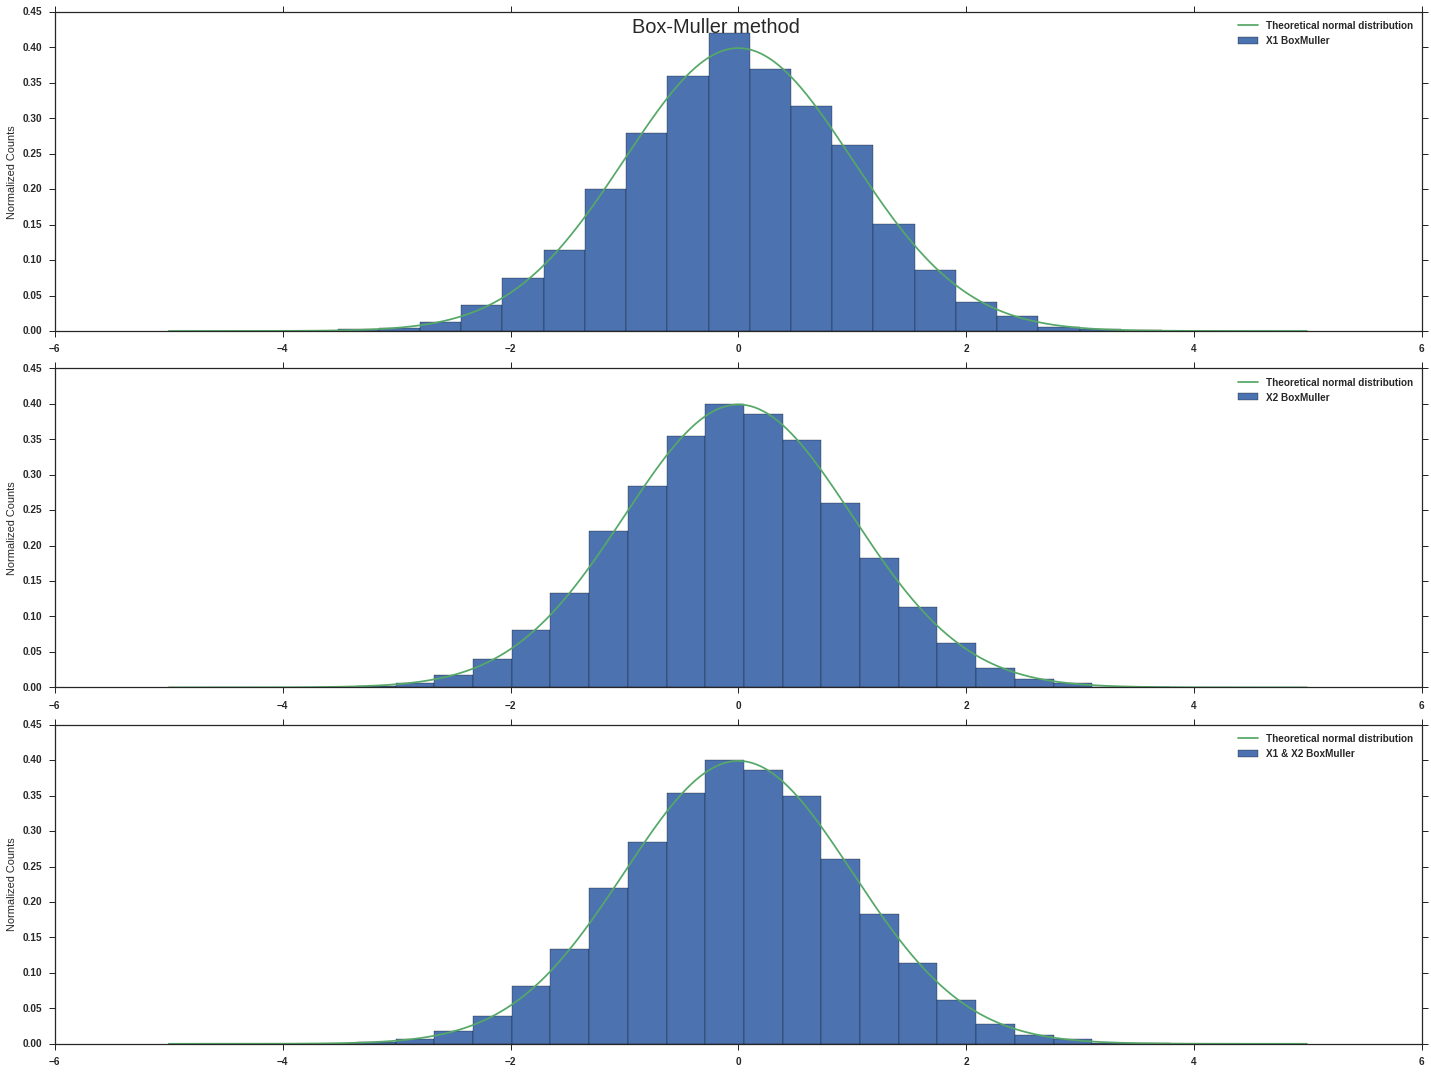

In [234]:
# Function defining BoxMUller
def BoxMuller():

    U1 = np.random.uniform()
    U2 = np.random.uniform()

    X1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    X2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
    
    return X1,X2

boxlist=[]
N = 10000
x1list=[]
x2list=[]
for i in range(N):
    x1,x2 = BoxMuller()
    x1list.append(x1)
    x2list.append(x2)
    boxlist.append(x1)
    boxlist.append(x2)

#     function defining a normal distribution
normaldist = ss.norm(0,1)

x = np.arange(-5,5,0.01)
bins = np.ceil(len(x1list)**(1./3.))

fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,15))
ax1.hist(x1list,bins,normed=True,label="X1 BoxMuller")
ax1.plot(x,normaldist.pdf(x),label="Theoretical normal distribution")
ax1.set_ylabel("Normalized Counts")

ax2.hist(x2list,bins,normed = True, label = "X2 BoxMuller")
ax2.plot(x,normaldist.pdf(x), label = "Theoretical normal distribution")
ax2.set_ylabel("Normalized Counts")

ax3.hist(x2list,bins,normed = True, label = "X1 & X2 BoxMuller")
ax3.plot(x,normaldist.pdf(x), label = "Theoretical normal distribution")
ax3.set_ylabel("Normalized Counts")

ax1.legend()
ax2.legend()
ax3.legend()
plt.suptitle("Box-Muller method",fontsize = 20)
plt.tight_layout()
plt.show()

As can be seen in the plot above Box-Muller is very comparable to the normal distribution

## Question 6

for the derrivation see added pdf

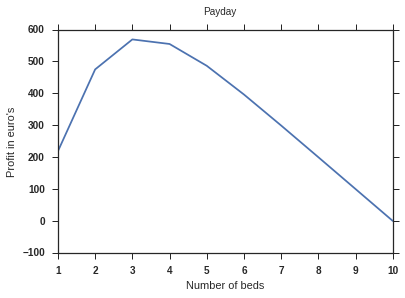

As can be seen in the plot the maximum clearly lies on 3 beds which has a profit of: 569.19


In [229]:
# define bedlist,lambda and a poisson distribution
bedlist = np.arange(1,11,1)
lamb=2
beds = 1
p = ss.poisson(lamb)
profitlist = []

# calculate profit
for beds in bedlist:
    x = np.arange(0,beds,1)
    profit = (500*beds - 100*lamb) -600*beds*sum(p.pmf(x)) + 600*sum(x*p.pmf(x))
    profitlist.append(profit)
    beds+=1

plt.plot(bedlist,profitlist)
plt.xlabel("Number of beds")
plt.ylabel("Profit in euro's")
plt.suptitle("Payday")
plt.show()

print "As can be seen in the plot the maximum clearly lies on 3 beds which has a profit of: %0.2f" %profitlist[2]

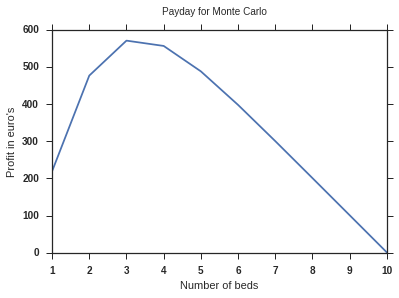

As can be seen in the plot the maximum again clearly lies on 3 beds which has a profit of: 570.35


In [228]:
# n is number of days
n=100000
profitlist = []
numberopatients = ss.poisson.rvs(mu=2, size=n)

# calculate the profit
for beds in bedlist:
    profit = []
    for patients in numberopatients:
        if patients <= beds:
            profit.append(-100* beds + 500 * patients)
        else:
            profit.append(500 * beds - 100 * patients)
    profitlist.append(np.mean(profit))

plt.plot(bedlist,profitlist)
plt.xlabel("Number of beds")
plt.ylabel("Profit in euro's")
plt.suptitle("Payday for Monte Carlo")
plt.show()
print "As can be seen in the plot the maximum again clearly lies on 3 beds which has a profit of: %0.2f" %profitlist[2]

## Question 7

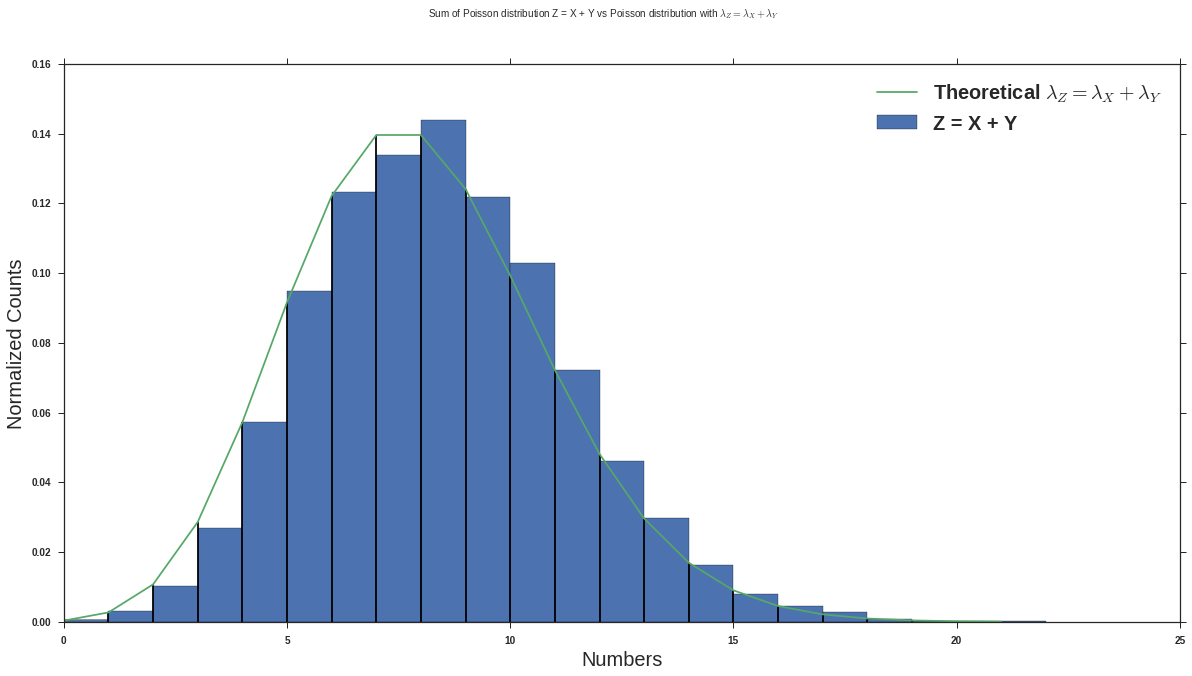

In [249]:
lambX = 3
lambY = 5
# First calculate X and Y poisson seperately and add to Z
X = ss.poisson.rvs(mu= lambX,size= 10000)
Y = ss.poisson.rvs(mu= lambY,size= 10000)
Z = Y+X

# Add lambda X and lambda Y directly to each other and then calculate poisson
Ztheory = ss.poisson(lambX+lambY)
xcont = np.arange(min(Z), max(Z),1)
x = np.arange(0,26,1)
fig,ax1 = plt.subplots(1,1,figsize=(20,10))

ax1.hist(Z,np.ceil(len(Z)**(1./3.)),normed = True,label ="Z = X + Y")
ax1.plot(xcont,Ztheory.pmf(xcont),label="Theoretical $\lambda_Z =\lambda_X + \lambda_Y$")
ax1.vlines(x,0,Ztheory.pmf(x))
ax1.set_ylabel("Normalized Counts", fontsize=20)
ax1.set_xlabel("Numbers",fontsize = 20)
plt.legend(fontsize = 20)
plt.suptitle("Sum of Poisson distribution Z = X + Y vs Poisson distribution with $\lambda_Z =\lambda_X + \lambda_Y$")
plt.show()

As can be seen the Z= X+Y is very similar to using the poisson distribution of the combined $\lambda_Z = \lambda_X + \lambda_Y$

## Question 8

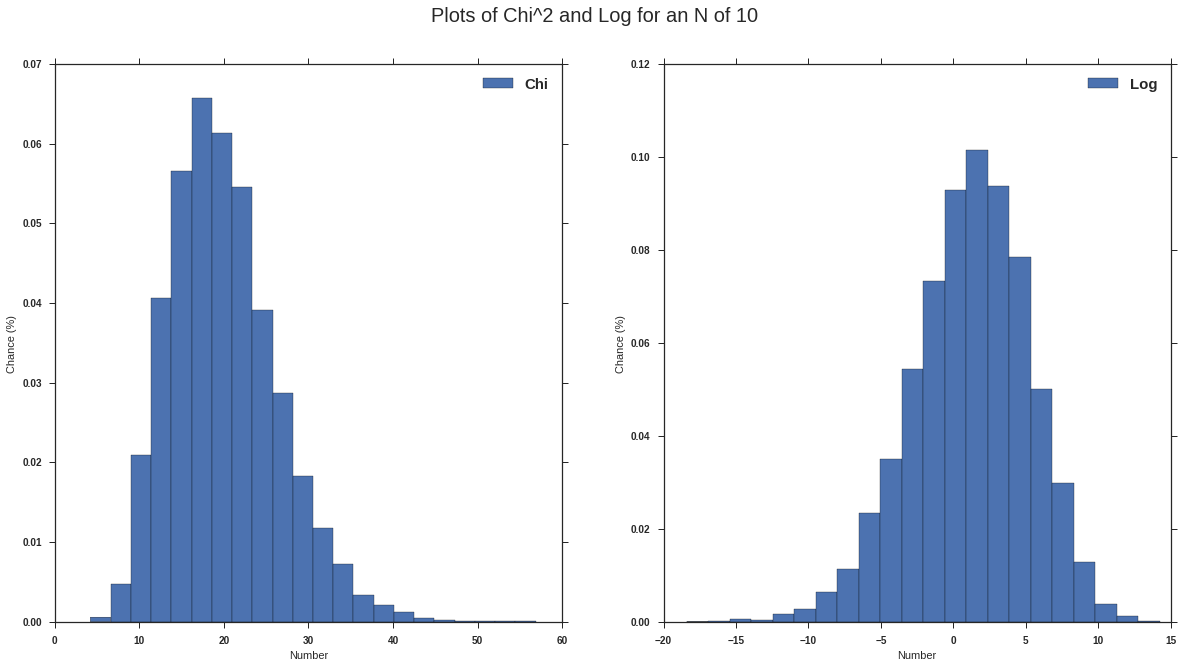

The p-value for Chi^2 is 1.30514862923e-153 for an N of 10
The p-value for Log is 8.70655747332e-51 for an N of 10


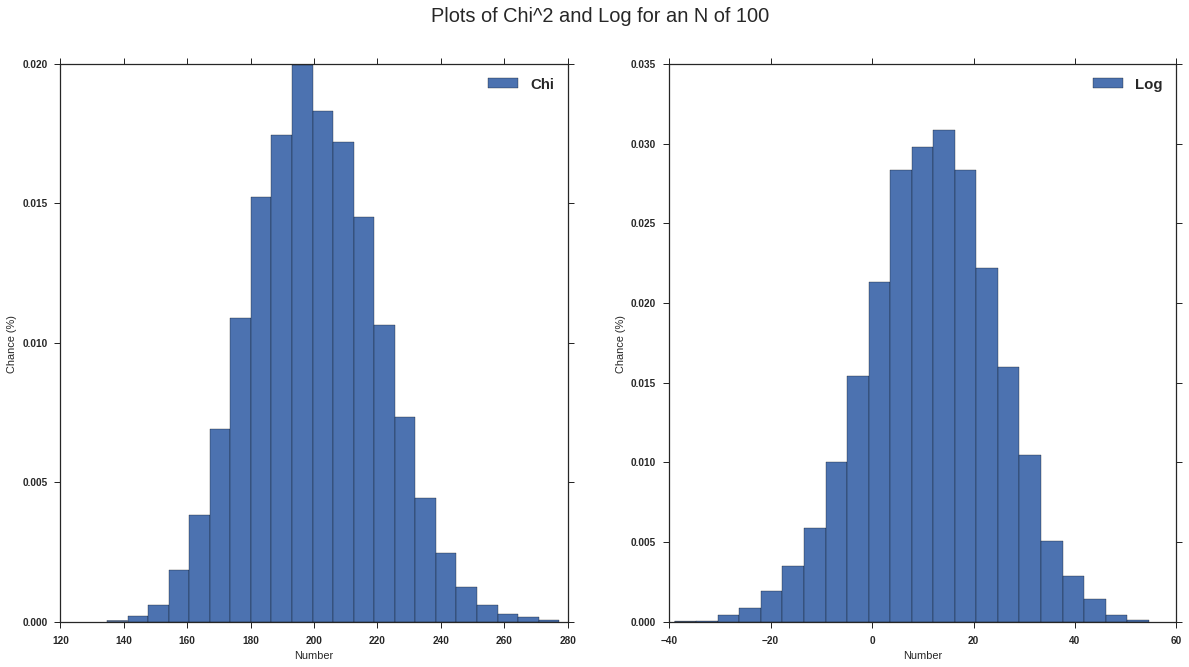

The p-value for Chi^2 is 8.63670193878e-12 for an N of 100
The p-value for Log is 6.46676172531e-05 for an N of 100


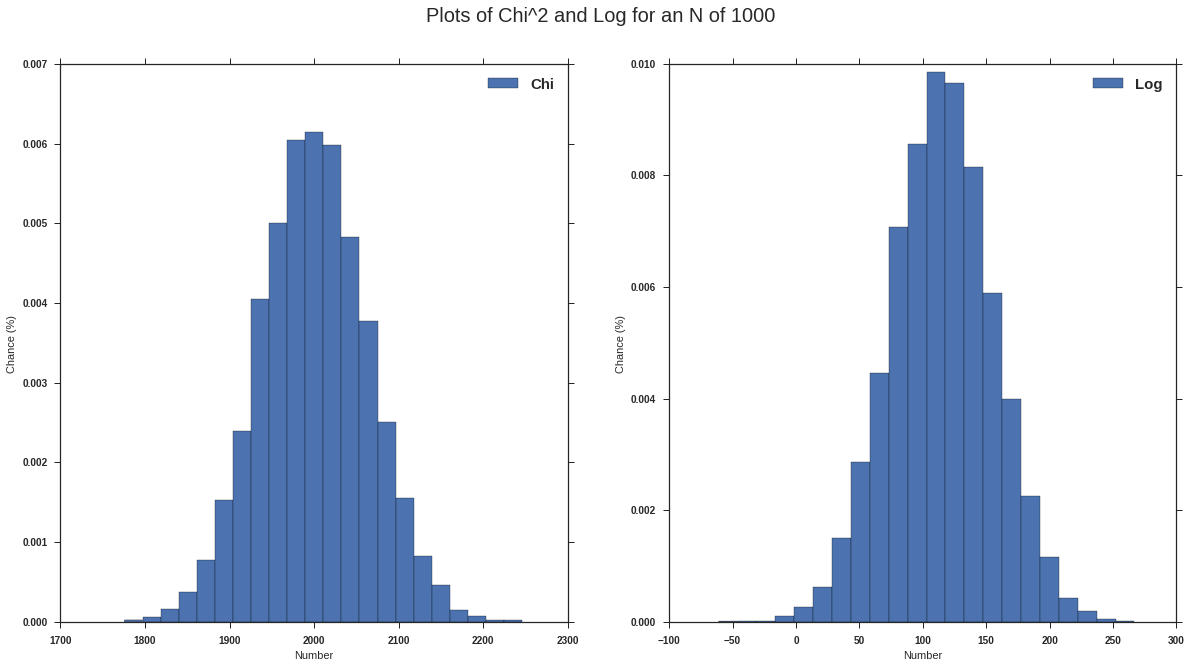

The p-value for Chi^2 is 0.0672064870665 for an N of 1000
The p-value for Log is 0.585140540066 for an N of 1000


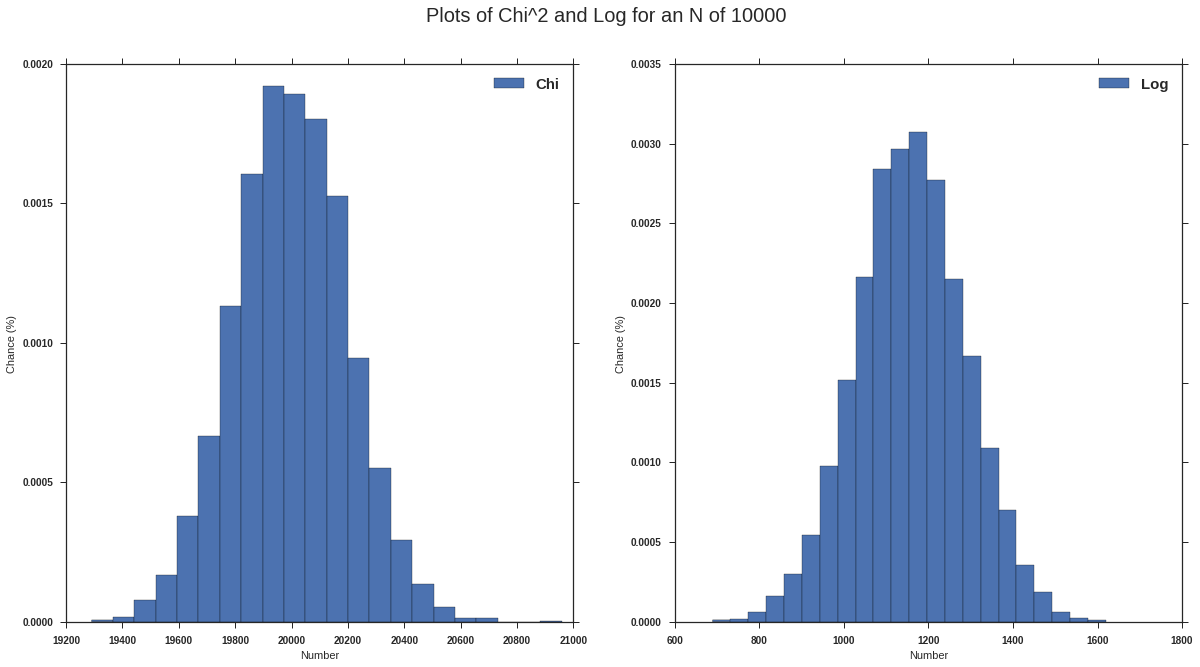

The p-value for Chi^2 is 0.243790414939 for an N of 10000
The p-value for Log is 0.930300978155 for an N of 10000


In [237]:
# take the chisquaredsum
def ChiSum(N):
    chisum=0
    for i in range(N):
        chisum += ss.chi2.rvs(df=2,size=10000)
    return chisum

# take the logsum
def ChiLogSum(N):
    chilogsum=0
    for i in range (N): 
        chilogsum +=np.log(ss.chi2.rvs(df=2,size=10000)) 
    return chilogsum


# Number of times repeating the ChiSum or the ChiLogSum
Nlist=[10,100,1000,10000]



for N in Nlist:
    sumnolog = ChiSum(N)
    sumyeslog = ChiLogSum(N)
    fig,(ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
    ax1.hist(sumnolog,bins=np.ceil(len(sumnolog)**(1./3.)),normed=True,label = "Chi")
    ax1.set_ylabel("Chance (%)")
    ax1.set_xlabel("Number")
    ax2.hist(sumyeslog,bins=np.ceil(len(sumyeslog)**(1./3.)),normed=True, label = "Log")
    ax2.set_ylabel("Chance (%)")
    ax2.set_xlabel("Number")
    ax1.legend(fontsize="15")
    ax2.legend(fontsize="15")
    plt.suptitle("Plots of Chi^2 and Log for an N of %i" %N,fontsize=20)
    plt.show()
#     test for normaldistribution using function scipy.stats.normaltest
    print "The p-value for Chi^2 is {} for an N of {}" .format(ss.normaltest(sumnolog)[1],N)
    print "The p-value for Log is {} for an N of {}" .format(ss.normaltest(sumyeslog)[1],N)



As can be seen the sum of Log tends to go to normal quicker then the sum of chisquared. Because the p-value tends to go to 1 faster.